In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch.nn as nn
import torch.optim as optim
import torch

In [3]:
from utils import MnistData
from models import ModelManager, ModelType

In [4]:
model_loaded = ModelManager.get_trained(ModelType.MnistCnnPatt)
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

In [5]:
data = MnistData()

In [6]:
images = None

In [110]:
generator = ModelManager.get_untrained(ModelType.MnistGanGenerator)
discriminator = ModelManager.get_untrained(ModelType.MnistGanDiscriminator)

--- 0 ---


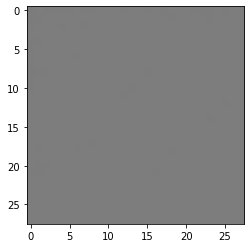

--- 10 ---


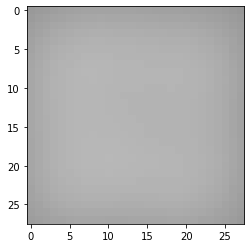

--- 20 ---


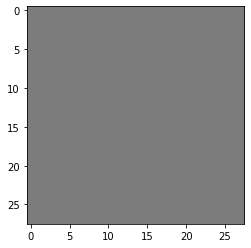

--- 30 ---


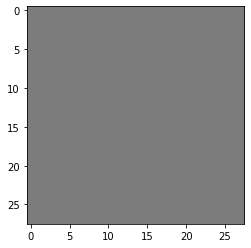

KeyboardInterrupt: 

In [111]:
batch_size = 10
loss_fn = nn.BCELoss()
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=1e-2)
generator_optimizer = optim.Adam(generator.parameters(), lr=1e-3)
batch, _ = data.get_training_batch(batch_size)
rand_batch = torch.rand((batch_size, 1, 28, 28))
images = batch
for epoch in range(101):
    # batch, _ = data.get_training_batch(batch_size)
    # rand_batch = torch.rand((batch_size, 1, 28, 28))
    images = generator(rand_batch)
    generator_optimizer.zero_grad()
    
    discriminator_optimizer.zero_grad()
    d_preds = discriminator(images)
    loss_one = loss_fn(d_preds, torch.zeros(batch_size, 1)) \
        + loss_fn(discriminator(batch), torch.ones(batch_size, 1))
    loss_one.backward(retain_graph=True)
    discriminator_optimizer.step()

    generator_optimizer.zero_grad()
    loss_two = loss_fn(discriminator(images), torch.ones(batch_size, 1))
    loss_two.backward()
    generator_optimizer.step()
    
    #batch, _ = data.get_training_batch(batch_size)
    
    if epoch % 10 == 0:
        print(f'--- {epoch} ---')
        MnistData.display(images[0], scale=True)

In [102]:
discriminator(images), discriminator(batch)

(tensor([[3.0460e-11],
         [3.0460e-11],
         [3.0460e-11],
         [3.0460e-11],
         [3.0460e-11],
         [3.0460e-11],
         [3.0460e-11],
         [3.0460e-11],
         [3.0460e-11],
         [3.0460e-11]], grad_fn=<SigmoidBackward>),
 tensor([[1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.],
         [1.]], grad_fn=<SigmoidBackward>))

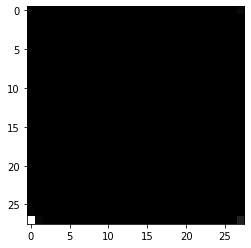

In [103]:
#images = generator(model_loaded(data.get_training_batch(batch_size)[0]) * 0.9)
for i in range(1):
    MnistData.display(images[i])

In [11]:
ModelManager.save_model(ModelType.MnistGanDiscriminator, discriminator)